# ניתוח ציוני בחינות בגרות בישראל


מוטיבציה ומטרות:
בחינות הבגרות מתבצעות מדי שנה בתיכונים השונים בישראל. ציוני הבחינות מהווים מפתח לקבלה ללימודי תואר באוניברסיטאות ומכללות, ובעקבות כך אפשרות להיכנס לשוק העבודה. בפרויקט זה, נרצה לבדוק אילו קריטריונים משפיעים על הצלחה וכשלון בבחינות הבגרות. נבחן קריטריונים שונים בנוגע לבית הספר וכן את המצב הסוציואקונומי של האוכלוסייה הנבחנת. מטרתנו היא להיעזר במסקנות שנמצא על מנת למזער את הפערים בחברה ולאפשר לכל תלמיד הזדמנות שווה להצלחה בבחינות הבגרות.
ניצבים לפנינו שני קשיים עיקריים, מידע חסר רב (נתונים לא שלמים) וסוגי מידע שונים והיכולת לשלב בינהם.

מקורות:

הנתונים נלקחו מתוך האתרים הבאים:

•	מידע לעם

•	שקיפות בחינוך

•	הלשכה המרכזית לסטטיסטיקה


הקוד:

In [1]:
import pandas as pd
import seaborn as sb
import requests
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
#משיכת טבלת פרטי בתי הספר
file_id='1wYTbFyhGgsSqut9Z5Ec1kj9q2X16Es2w'
link='https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)
df_schools = pd.read_csv(csv_url)
df_schools

,semel,school,district,town,locality,sector,Inspection,wrong_notebooks,entitlement_to_bagrut,excellence_bagrut,...,num_of_classes,average_students _per _class,army_recruitment_men,army_recruitment_women,national_service_men,national_service_women,town_symbol,population,index_value,cluster_1_to_10
0,148080,מקיף אבו גוש,ירושלים,אבו גוש,ABU GHOSH,ערבי,ממלכתי,2.686109,59.8,0.0,...,12,24.500000,NaN,NaN,0.118,0.176,472.0,6894.604873,-0.761583,3.0
1,248559,אבו-סלים סלמאן אלשיך,צפון,אבו סנאן,ABU SINAN,דרוזי,NaN,2.394314,62.9,7.1,...,20,28.850000,0.950,NaN,0.029,0.209,473.0,13357.669960,-0.752622,3.0
2,648220,תיכון אורט אבוקרינט,דרום,אבו קרינאת )יישוב(,ABU QUREINAT,בדואי,NaN,1.328502,42.0,0.9,...,15,27.400000,NaN,NaN,0.000,NaN,1342.0,1218.360192,-2.220970,1.0
3,440180,מקיף הדסים,חינוך התישבותי,אבן יהודה,EVEN YEHUDA,יהודי,ממלכתי,0.099502,88.2,16.2,...,32,27.250000,0.983,0.975,0.000,0.017,182.0,13125.224050,1.535259,8.0
4,640532,אולפנת אבן שמואל,חינוך התישבותי,אבן שמואל,EVEN SHEMU'EL,יהודי,NaN,0.097324,94.1,8.4,...,10,31.000000,NaN,0.044,NaN,0.971,400.0,1535.417540,-0.389875,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,770297,עירוני יד',תל אביב,תל אביב - יפו,TEL AVIV - YAFO,יהודי,ממלכתי,0.041051,94.3,7.2,...,16,33.562500,0.965,0.969,0.000,0.015,5000.0,431708.214600,1.207843,8.0
673,444034,נוה הדסה,חינוך התישבותי,תל יצחק,TEL YIZHAQ,יהודי,ממלכתי,0.274725,72.3,0.0,...,10,15.200000,0.976,NaN,0.000,NaN,287.0,949.501823,-0.207854,4.0
674,441279,"בית חינוך ע""ש רבין",מרכז,תל מונד,TEL MOND,יהודי,ממלכתי,0.000000,90.8,23.1,...,24,33.166667,0.992,0.984,0.015,0.000,154.0,11940.774210,1.403461,8.0
675,648089,מקיף עתיד אלביאן,דרום,תל שבע,TEL SHEVA,בדואי,ממלכתי,7.411067,32.2,0.0,...,10,23.400000,NaN,NaN,NaN,NaN,1054.0,18671.150540,-2.311876,1.0


In [3]:
#ציוני בגרות שנים 2013-2016
file_id='19aDtOPWZ09q0qKBeC_yeOeguuxWcKcjY'
link='https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)
df_bagrut = pd.read_csv(csv_url)
df_bagrut

,semel,school,city,year,subject,grade,takers
0,148080,מקיף אבו גוש,אבו גוש,2016,english_3,71.73,26
1,148080,מקיף אבו גוש,אבו גוש,2016,english_4,81.00,22
2,148080,מקיף אבו גוש,אבו גוש,2016,english_5,86.60,20
3,148080,מקיף אבו גוש,אבו גוש,2016,math_3,74.46,28
4,148080,מקיף אבו גוש,אבו גוש,2016,math_4,84.41,22
...,...,...,...,...,...,...,...
29217,800144,מקיף עמל תל שבע א',תל שבע,2013,english_3,69.09,35
29218,800144,מקיף עמל תל שבע א',תל שבע,2013,english_4,69.25,60
29219,800144,מקיף עמל תל שבע א',תל שבע,2013,history,66.53,43
29220,800144,מקיף עמל תל שבע א',תל שבע,2013,math_3,74.46,87


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


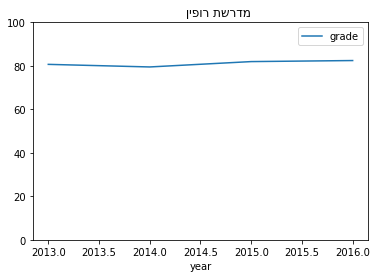

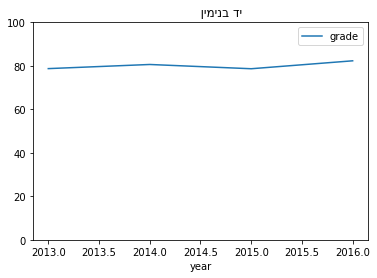

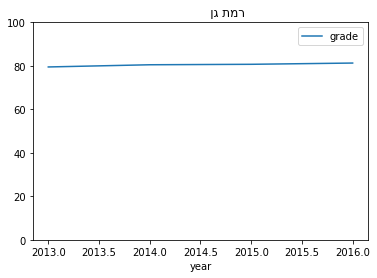

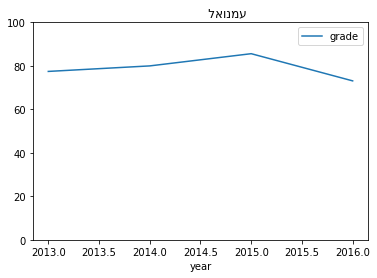

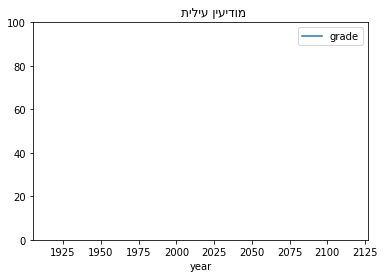

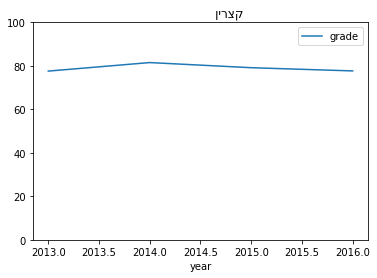

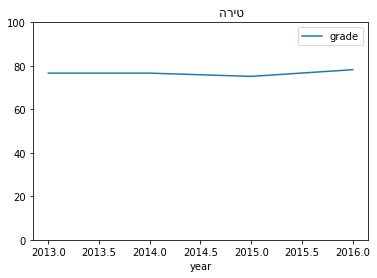

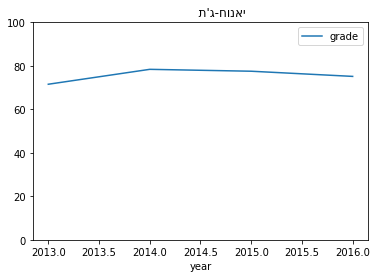

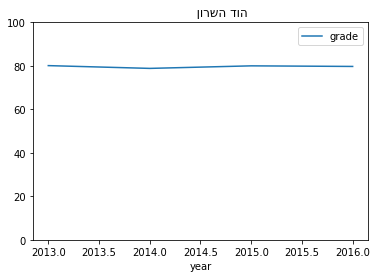

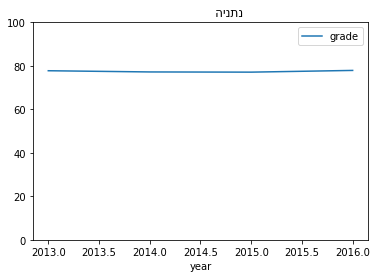

In [4]:
# ננסה לראות שינויים בין שנים שונות לפי עיר בבדיקה אקראית של ערים
store_data = pd.DataFrame()
def reverse_city(value):
    return value[::-1]
df_bagrut['reverse_city'] =  df_bagrut['city'].apply(reverse_city)
unique_cities = df_bagrut['city'].unique()

def gen_chart():
    random_city = random.choices(unique_cities,k=1)[0]
    city_data = df_bagrut[df_bagrut['city'] == random_city].groupby(['year']).mean().reset_index()
    print(city_data.plot.line(x='year', y='grade',ylim=(0,100),title=random_city[::-1],figsize=(6,4)))
    return df_bagrut[df_bagrut['city'] == random_city]


for _ in range(10):
    city_data = gen_chart()
    store_data = store_data.append(city_data)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


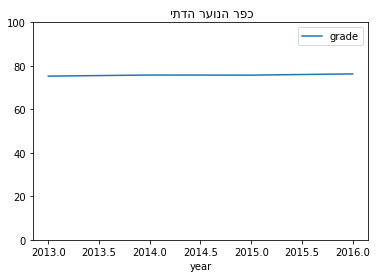

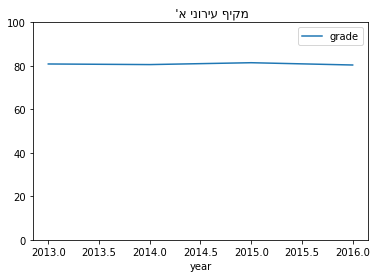

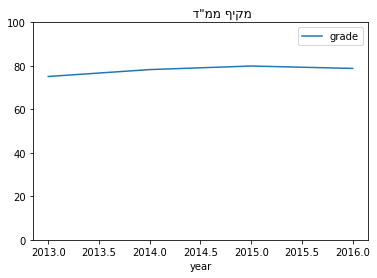

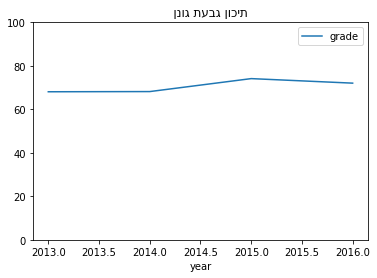

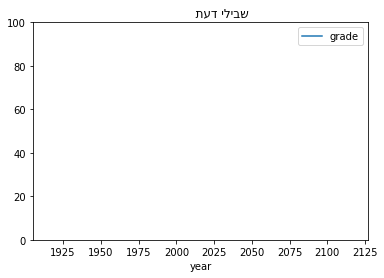

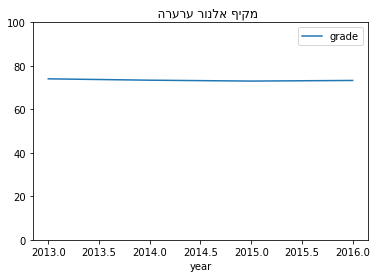

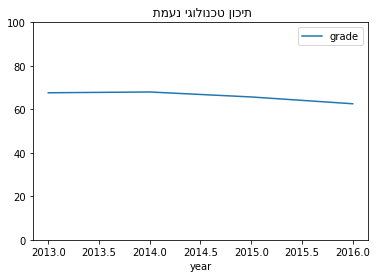

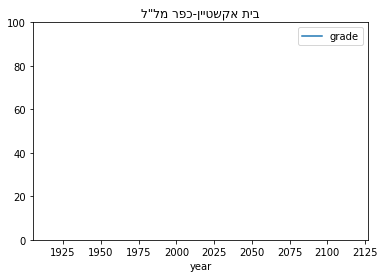

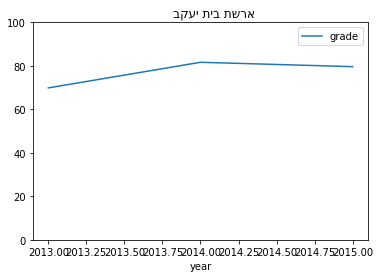

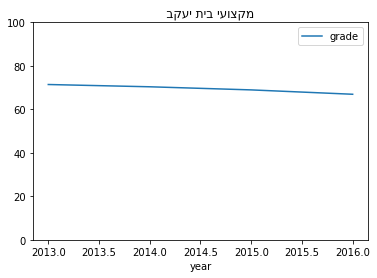

In [5]:
# ננסה לראות שינויים בין שנים שונות לפי בית ספר בבדיקה אקראית של בתי ספר
store_data = pd.DataFrame()
def reverse_city(value):
    return value[::-1]
df_bagrut['reverse_school'] =  df_bagrut['school'].apply(reverse_city)
unique_schools = df_bagrut['school'].unique()

def gen_chart():
    random_school = random.choices(unique_schools,k=1)[0]
    school_data = df_bagrut[df_bagrut['school'] == random_school].groupby(['year']).mean().reset_index()
    print(school_data.plot.line(x='year', y='grade',ylim=(0,100),title=random_school[::-1],figsize=(6,4)))
    return df_bagrut[df_bagrut['school'] == random_school]


for _ in range(10):
    school_data = gen_chart()
    store_data = store_data.append(school_data)

כמעט בכל בתי הספר והערים השינויים בין השנים היו זניחים ולכן נעבור לטבלה לשנת 2016 בלבד

In [6]:
#משיכת טבלת ציוני הבגרות 2016 בלבד
file_id='1fz7grnWV0ljHK4n62ONQiJAycx__KmRV'
link='https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)
df_bagrut = pd.read_csv(csv_url)
df_bagrut

,semel,school,city,subject,grade,takers
0,148080,מקיף אבו גוש,אבו גוש,english_3,71.73,26
1,148080,מקיף אבו גוש,אבו גוש,english_4,81.00,22
2,148080,מקיף אבו גוש,אבו גוש,english_5,86.60,20
3,148080,מקיף אבו גוש,אבו גוש,math_3,74.46,28
4,148080,מקיף אבו גוש,אבו גוש,math_4,84.41,22
...,...,...,...,...,...,...
7583,800144,מקיף עמל תל שבע א',תל שבע,math_3,67.60,96
7584,800144,מקיף עמל תל שבע א',תל שבע,math_4,71.00,15
7585,660225,תיכון אורט תראבין,תראבין א-צאנע)ישוב(,ezrahut,NaN,7
7586,660225,תיכון אורט תראבין,תראבין א-צאנע)ישוב(,english_3,NaN,6


In [7]:
#הורדת בגרויות ללא ציון- עם פחות מ11 נבחנים
df_bagrut = df_bagrut.dropna(axis=0) #remove nulls
df_bagrut

,semel,school,city,subject,grade,takers
0,148080,מקיף אבו גוש,אבו גוש,english_3,71.73,26
1,148080,מקיף אבו גוש,אבו גוש,english_4,81.00,22
2,148080,מקיף אבו גוש,אבו גוש,english_5,86.60,20
3,148080,מקיף אבו גוש,אבו גוש,math_3,74.46,28
4,148080,מקיף אבו גוש,אבו גוש,math_4,84.41,22
...,...,...,...,...,...,...
7579,800144,מקיף עמל תל שבע א',תל שבע,english_3,65.91,82
7580,800144,מקיף עמל תל שבע א',תל שבע,english_4,71.54,26
7582,800144,מקיף עמל תל שבע א',תל שבע,history,68.50,115
7583,800144,מקיף עמל תל שבע א',תל שבע,math_3,67.60,96


In [8]:
#איחוד עם טבלת  ציוני הבגרות
df = df_schools.merge(df_bagrut, on=["semel","school"])
df.head()

,semel,school,district,town,locality,sector,Inspection,wrong_notebooks,entitlement_to_bagrut,excellence_bagrut,...,national_service_men,national_service_women,town_symbol,population,index_value,cluster_1_to_10,city,subject,grade,takers
0,148080,מקיף אבו גוש,ירושלים,אבו גוש,ABU GHOSH,ערבי,ממלכתי,2.686109,59.8,0.0,...,0.118,0.176,472.0,6894.604873,-0.761583,3.0,אבו גוש,english_3,71.73,26
1,148080,מקיף אבו גוש,ירושלים,אבו גוש,ABU GHOSH,ערבי,ממלכתי,2.686109,59.8,0.0,...,0.118,0.176,472.0,6894.604873,-0.761583,3.0,אבו גוש,english_4,81.00,22
2,148080,מקיף אבו גוש,ירושלים,אבו גוש,ABU GHOSH,ערבי,ממלכתי,2.686109,59.8,0.0,...,0.118,0.176,472.0,6894.604873,-0.761583,3.0,אבו גוש,english_5,86.60,20
3,148080,מקיף אבו גוש,ירושלים,אבו גוש,ABU GHOSH,ערבי,ממלכתי,2.686109,59.8,0.0,...,0.118,0.176,472.0,6894.604873,-0.761583,3.0,אבו גוש,math_3,74.46,28
4,148080,מקיף אבו גוש,ירושלים,אבו גוש,ABU GHOSH,ערבי,ממלכתי,2.686109,59.8,0.0,...,0.118,0.176,472.0,6894.604873,-0.761583,3.0,אבו גוש,math_4,84.41,22


In [9]:
df=df.set_index(["town","school","subject"])
#אינדקסים לפי עיר, בית ספר ומקצוע
#השמטת עמודות לא רלוונטיות-עיר בעברית ואחוז תלמידים במסלול טכנולוגי
df = df.drop(['city', 'students_in_technology_education'], axis=1)
df

semel district  \
town                 school               subject                      
אבו גוש              מקיף אבו גוש         english_3  148080  ירושלים   
                                          english_4  148080  ירושלים   
                                          english_5  148080  ירושלים   
                                          math_3     148080  ירושלים   
                                          math_4     148080  ירושלים   
...                                                     ...      ...   
תל שבע               מקיף עמל תל שבע א'   english_3  800144     דרום   
                                          english_4  800144     דרום   
                                          history    800144     דרום   
                                          math_3     800144     דרום   
                                          math_4     800144     דרום   

                                                      locality sector  \
town                 school               subject                       
אבו גוש              מקיף אבו גוש         english_3  ABU GHOSH   ערבי   
                                          english_4  ABU GHOSH   ערבי   
                                          english_5  ABU GHOSH   ערבי   
                                          math_3     ABU GHOSH   ערבי   
                                          math_4     ABU GHOSH   ערבי   
...                                                        ...    ...   
תל שבע               מקיף עמל תל שבע א'   english_3  TEL SHEVA  בדואי   
                                          english_4  TEL SHEVA  בדואי   
                                          history    TEL SHEVA  בדואי   
                                          math_3     TEL SHEVA  בדואי   
                                          math_4     TEL SHEVA  בדואי   

                                                    Inspection  \
town                 school               subject                
אבו גוש              מקיף אבו גוש         english_3     ממלכתי   
                                          english_4     ממלכתי   
                                          english_5     ממלכתי   
                                          math_3        ממלכתי   
                                          math_4        ממלכתי   
...                                                        ...   
תל שבע               מקיף עמל תל שבע א'   english_3     ממלכתי   
                                          english_4     ממלכתי   
                                          history       ממלכתי   
                                          math_3        ממלכתי   
                                          math_4        ממלכתי   

                                                     wrong_notebooks  \
town                 school               subject                      
אבו גוש              מקיף אבו גוש         english_3         2.686109   
                                          english_4         2.686109   
                                          english_5         2.686109   
                                          math_3            2.686109   
                                          math_4            2.686109   
...                                                              ...   
תל שבע               מקיף עמל תל שבע א'   english_3         8.564593   
                                          english_4         8.564593   
                                          history           8.564593   
                                          math_3            8.564593   
                                          math_4            8.564593   

                                                     entitlement_to_bagrut  \
town                 school               subject                            
אבו גוש              מקיף אבו גוש         english_3                   59.8   
                                          english_4                   59.8   
                                          english_5        

חלוקת ציונים כוללת

count    5195.000000
mean       78.525890
std         7.555212
min        40.410000
25%        73.370000
50%        78.750000
75%        84.190000
max        98.800000
Name: grade, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


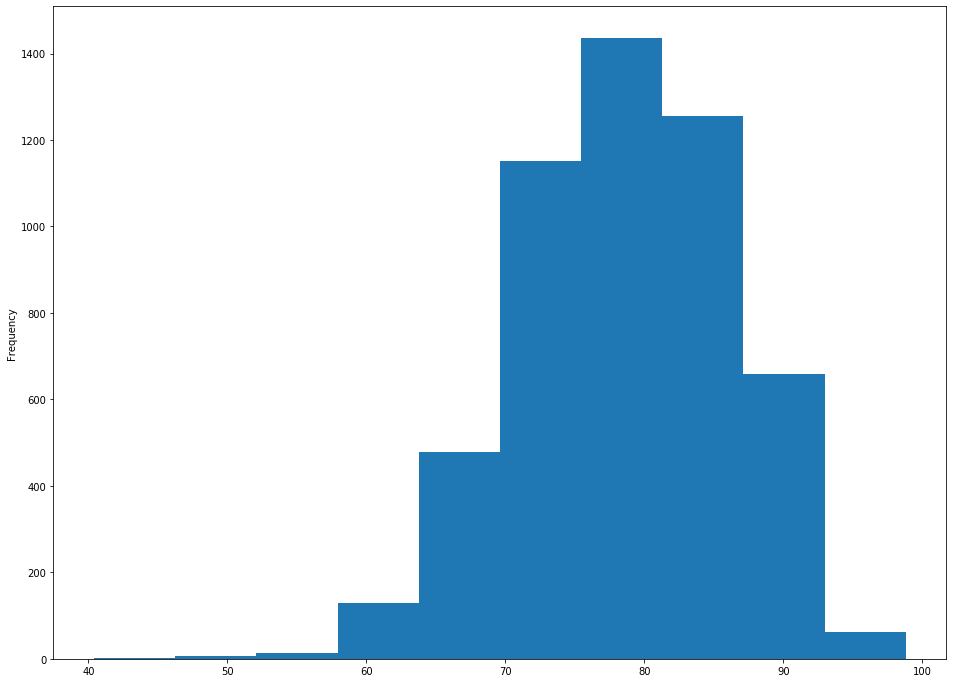

In [10]:
print(df['grade'].describe())
print(df.grade.plot.hist(figsize=(16,12)))

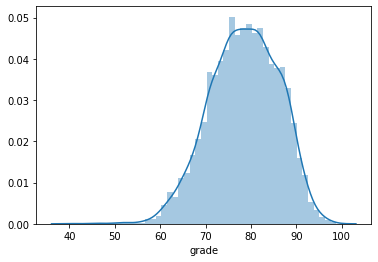

In [11]:
sb.distplot(df.grade)

נוסיף עמודה של ציונים מעל 70, ננסה לראות האם ישנה חוקיות לגבי ציון גבוה או נמוך יותר.

In [12]:
df['over-70']=(df['grade']>70)


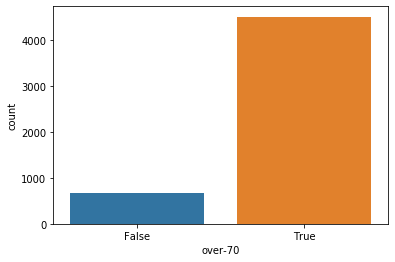

In [13]:
sb.countplot(df['over-70'], label="Count")

In [14]:
df = df.dropna(axis=0) #remove nulls
df = df.drop(['semel', 'district', 'locality', 'sector', 'Inspection'], axis=1)
classes = df['over-70']                
df

wrong_notebooks  \
town                 school               subject                      
אבן יהודה            מקיף הדסים           english_3         0.099502   
                                          english_4         0.099502   
                                          english_5         0.099502   
                                          math_3            0.099502   
                                          math_4            0.099502   
...                                                              ...   
תל מונד              בית חינוך ע"ש רבין   history           0.000000   
                                          math_3            0.000000   
                                          math_4            0.000000   
                                          math_5            0.000000   
                                          bible             0.000000   

                                                     entitlement_to_bagrut  \
town                 school               subject                            
אבן יהודה            מקיף הדסים           english_3                   88.2   
                                          english_4                   88.2   
                                          english_5                   88.2   
                                          math_3                      88.2   
                                          math_4                      88.2   
...                                                                    ...   
תל מונד              בית חינוך ע"ש רבין   history                     90.8   
                                          math_3                      90.8   
                                          math_4                      90.8   
                                          math_5                      90.8   
                                          bible                       90.8   

                                                     excellence_bagrut  \
town                 school               subject                        
אבן יהודה            מקיף הדסים           english_3               16.2   
                                          english_4               16.2   
                                          english_5               16.2   
                                          math_3                  16.2   
                                          math_4                  16.2   
...                                                                ...   
תל מונד              בית חינוך ע"ש רבין   history                 23.1   
                                          math_3                  23.1   
                                          math_4                  23.1   
                                          math_5                  23.1   
                                          bible                   23.1   

                                                     median_seniority_teaching  \
town                 school               subject                                
אבן יהודה            מקיף הדסים           english_3                       19.0   
                                          english_4                       19.0   
                                          english_5                       19.0   
                                          math_3                          19.0   
                                          math_4                          19.0   
...                                                                        ...   
תל מונד              בית חינוך ע"ש רבין   history                         21.0   
                                          math_3                          21.0   
                                          math_4                          21.0   
                                          math_5                          21.0   
                                          bible                           21.0   

                                                     Num_of_teachers  \

נרמול הנתונים

In [15]:
features = df
features = ((features - features.mean()) / features.std())
data = features
data

wrong_notebooks  \
town                 school               subject                      
אבן יהודה            מקיף הדסים           english_3        -0.623909   
                                          english_4        -0.623909   
                                          english_5        -0.623909   
                                          math_3           -0.623909   
                                          math_4           -0.623909   
...                                                              ...   
תל מונד              בית חינוך ע"ש רבין   history          -0.949201   
                                          math_3           -0.949201   
                                          math_4           -0.949201   
                                          math_5           -0.949201   
                                          bible            -0.949201   

                                                     entitlement_to_bagrut  \
town                 school               subject                            
אבן יהודה            מקיף הדסים           english_3               0.350073   
                                          english_4               0.350073   
                                          english_5               0.350073   
                                          math_3                  0.350073   
                                          math_4                  0.350073   
...                                                                    ...   
תל מונד              בית חינוך ע"ש רבין   history                 0.600847   
                                          math_3                  0.600847   
                                          math_4                  0.600847   
                                          math_5                  0.600847   
                                          bible                   0.600847   

                                                     excellence_bagrut  \
town                 school               subject                        
אבן יהודה            מקיף הדסים           english_3           0.615505   
                                          english_4           0.615505   
                                          english_5           0.615505   
                                          math_3              0.615505   
                                          math_4              0.615505   
...                                                                ...   
תל מונד              בית חינוך ע"ש רבין   history             1.282618   
                                          math_3              1.282618   
                                          math_4              1.282618   
                                          math_5              1.282618   
                                          bible               1.282618   

                                                     median_seniority_teaching  \
town                 school               subject                                
אבן יהודה            מקיף הדסים           english_3                  -0.015573   
                                          english_4                  -0.015573   
                                          english_5                  -0.015573   
                                          math_3                     -0.015573   
                                          math_4                     -0.015573   
...                                                                        ...   
תל מונד              בית חינוך ע"ש רבין   history                     0.514627   
                                          math_3                      0.514627   
                                          math_4                      0.514627   
                                          math_5                      0.514627   
                                          bible                       0.514627   

                                                     Num_of_teachers  \

ביצענו מספר ויזואליזציות למציאת נתונים רלוונטים, להרבה מהניסיונות לא הייתה משמעות מעניינת לכן השמטנו אותם.


נתחיל הנצגת ויזואליזציית כינור:

נחפש קריטריונים מתאימים לקטלוג, בעזרת ויזואליזצית כינור. נראה שהויזואליזציה לא מחדשת לנו. נראה מספר דוגמאות לכך:

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

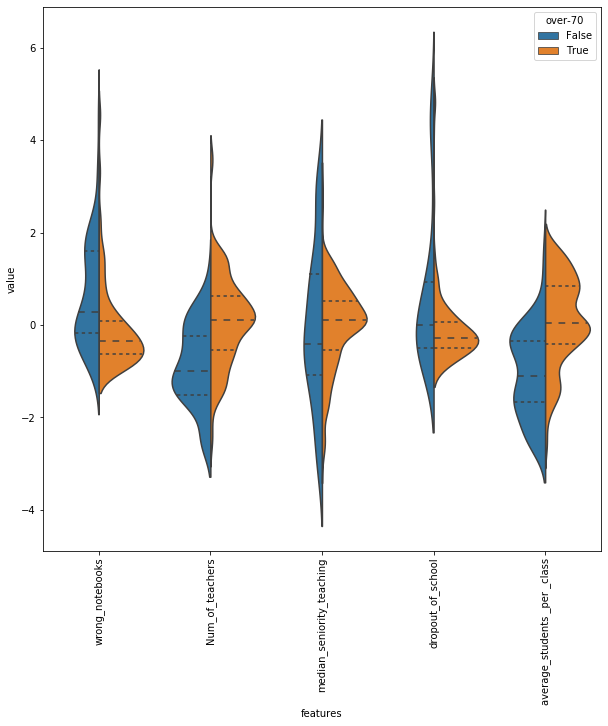

In [17]:
data = pd.concat([df['over-70'], features.iloc[:,[0,4,3,8,11]]], axis=1)
data = pd.melt(data, id_vars="over-70",
                     var_name="features",
                     value_name='value')
plt.figure(figsize=(10,10))
sb.violinplot(x="features", y="value", hue="over-70", data=data, split=True, inner="quart")
plt.xticks(rotation=90)

נעבור לויזואליזצית נחיל:

נציג מספר קבוצות:
1. נתוני מורים-3 קריטריונים
2. נתוני תלמידים-3 קריטריונים
3. השוואה בין 2 מדדים שונים של מצב סוציואקונומי
.ניתן לראות קשר בין דירוג המצב הסוציואקונימו (לפי מדד מ1 עד 10) לבין ממוצע ציוני הבגרות.

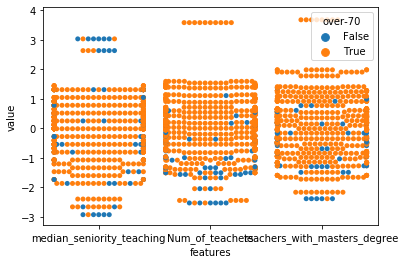

In [18]:
data = pd.concat([df['over-70'], features.iloc[:,[3,4,5]]], axis=1)
data = pd.melt(data, id_vars="over-70",
                     var_name="features",
                     value_name='value')
sb.swarmplot(x="features", y="value", hue="over-70", data=data)

ניתן לראות שמספר המורים ורמת ההשכלה שלהם משפיעים על ציוני התלמידים

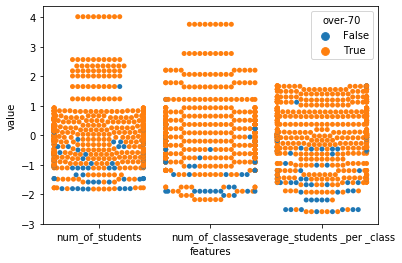

In [19]:
data = pd.concat([df['over-70'], features.iloc[:,[9,10,11]]], axis=1)
data = pd.melt(data, id_vars="over-70",
                     var_name="features",
                     value_name='value')
sb.swarmplot(x="features", y="value", hue="over-70", data=data)

עובדה מעניינת- ככל שיש יותר תלמידים בבית הספר, כך הציונים גבוהים יותר. כנל בנוגע למספר הכיתות ולממוצע סטודנטים בכיתה- להלן

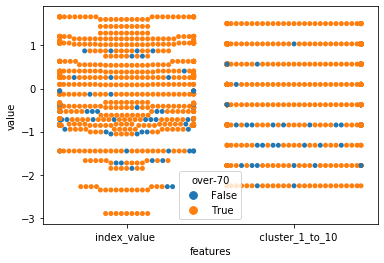

In [20]:
data = pd.concat([df['over-70'], features.iloc[:,18:20]], axis=1)
data = pd.melt(data, id_vars="over-70",
                     var_name="features",
                     value_name='value')
sb.swarmplot(x="features", y="value", hue="over-70", data=data)

ויזואליזצית פקטור:

כעת, נחלק את הנתונים ל4 קבוצות מעניינות:

1. נתונים על מורים-2 קריטריונים
2. נתונים על תלמידים-4 קריטריונים
3. השוואה בין שירות וגיוס של בנות לבין בנים. אצל בנות אפשר לראות שיש קשר בין סוג השירות לציון
4. השוואה בין 2 המדדים של המצב הסוציואקונומי. ניתן לראות קשר בין המצב הסוציואקונומי לבין הציונים


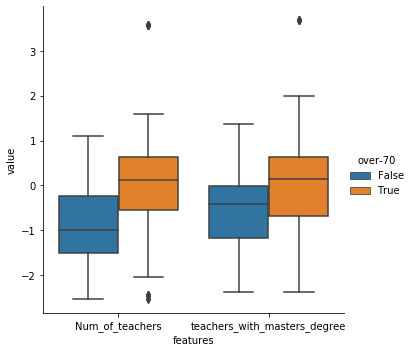

In [21]:
data = pd.concat([df['over-70'], features.iloc[:,4:6]], axis=1)
data = pd.melt(data, id_vars="over-70",
                     var_name="features",
                     value_name='value')
sb.catplot(x="features", y="value", hue="over-70", data=data, kind="box")

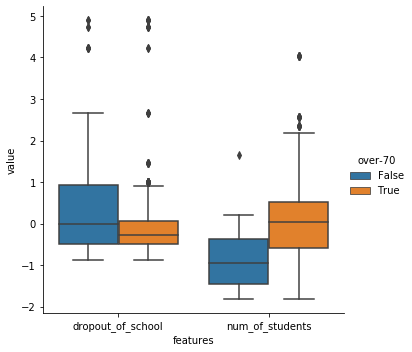

In [22]:
data = pd.concat([df['over-70'], features.iloc[:,[8,9]]], axis=1)
data = pd.melt(data, id_vars="over-70",
                     var_name="features",
                     value_name='value')
sb.catplot(x="features", y="value", hue="over-70", data=data, kind="box")

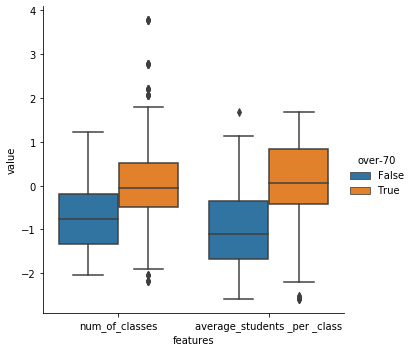

In [23]:
data = pd.concat([df['over-70'], features.iloc[:,10:12]], axis=1)
data = pd.melt(data, id_vars="over-70",
                     var_name="features",
                     value_name='value')
sb.catplot(x="features", y="value", hue="over-70", data=data, kind="box")

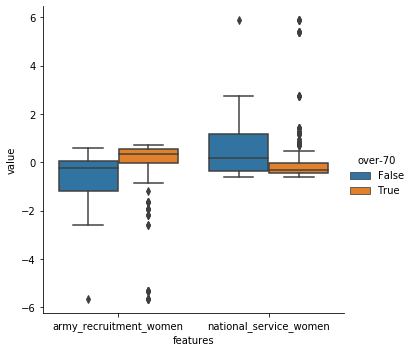

In [24]:
data = pd.concat([df['over-70'], features.iloc[:,[13,15]]], axis=1)
data = pd.melt(data, id_vars="over-70",
                     var_name="features",
                     value_name='value')
sb.catplot(x="features", y="value", hue="over-70", data=data, kind="box")

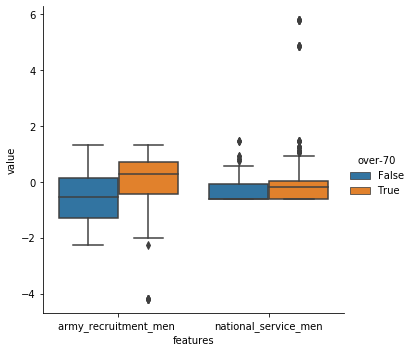

In [25]:
data = pd.concat([df['over-70'], features.iloc[:,[12,14]]], axis=1)
data = pd.melt(data, id_vars="over-70",
                     var_name="features",
                     value_name='value')
sb.catplot(x="features", y="value", hue="over-70", data=data, kind="box")

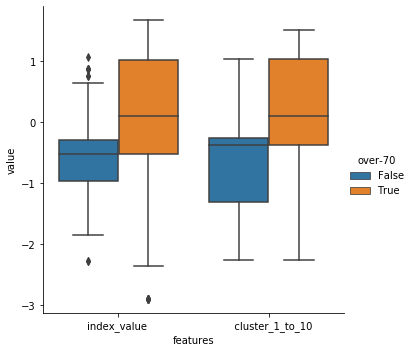

In [26]:
data = pd.concat([df['over-70'], features.iloc[:,18:20]], axis=1)
data = pd.melt(data, id_vars="over-70",
                     var_name="features",
                     value_name='value')
sb.catplot(x="features", y="value", hue="over-70", data=data, kind="box")

נסיון נוסף לניתוח הנתונים בצורה מדויקת יותר:

ננסה לחלק את הציונים לקבוצות לפי עשרות ונראה האם נזהה שינויים

החלוקה תתבצע כך:

60-70 =>6

70-80 =>7

80-90 =>8

90-100 =>9

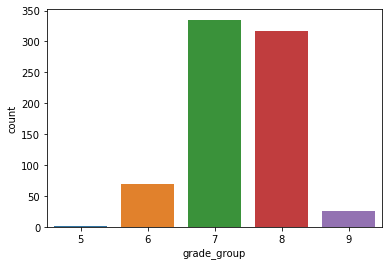

In [27]:
#חלוקת הציונים לקבוצות 

df["grade_group"]=df["grade"]/10
df["grade_group"]=df["grade_group"].astype(int)
df["grade_group"]
classes = classes = df['grade_group']
sb.countplot(df['grade_group'], label="Count")

ננסה כעת שוב את ויזואליזציית הנחיל. אין הרבה חידוש

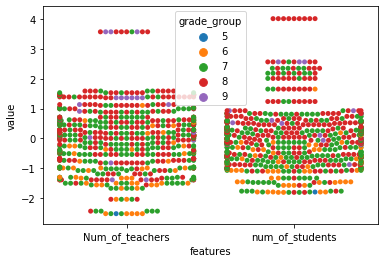

In [28]:
data = pd.concat([df['grade_group'], features.iloc[:,[4,9]]], axis=1)
data = pd.melt(data, id_vars="grade_group",
                     var_name="features",
                     value_name='value')
sb.swarmplot(x="features", y="value", hue="grade_group", data=data)

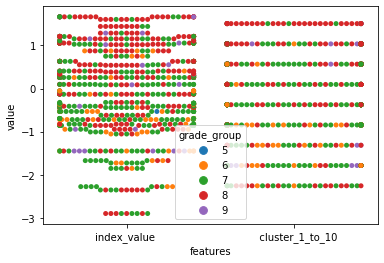

In [29]:
data = pd.concat([df['grade_group'], features.iloc[:,18:20]], axis=1)
data = pd.melt(data, id_vars="grade_group",
                     var_name="features",
                     value_name='value')
sb.swarmplot(x="features", y="value", hue="grade_group", data=data)

גם בויזואליזציית פקטור, לא מצאנו חידוש גדול, אלא חיזוק לממצאים שהוצגו קודם לכן:

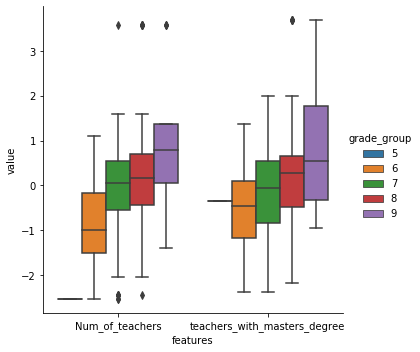

In [30]:
data = pd.concat([df['grade_group'], features.iloc[:,4:6]], axis=1)
data = pd.melt(data, id_vars="grade_group",
                     var_name="features",
                     value_name='value')
sb.catplot(x="features", y="value", hue="grade_group", data=data, kind="box")

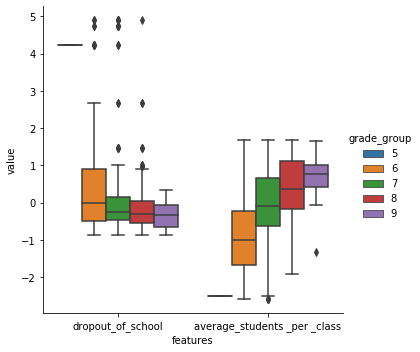

In [31]:
data = pd.concat([df['grade_group'], features.iloc[:,[8,11]]], axis=1)
data = pd.melt(data, id_vars="grade_group",
                     var_name="features",
                     value_name='value')
sb.catplot(x="features", y="value", hue="grade_group", data=data, kind="box")

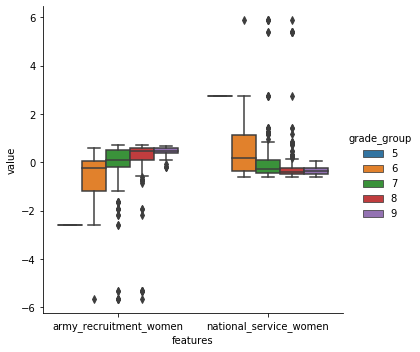

In [32]:
data = pd.concat([df['grade_group'], features.iloc[:,[13,15]]], axis=1)
data = pd.melt(data, id_vars="grade_group",
                     var_name="features",
                     value_name='value')
sb.catplot(x="features", y="value", hue="grade_group", data=data, kind="box")

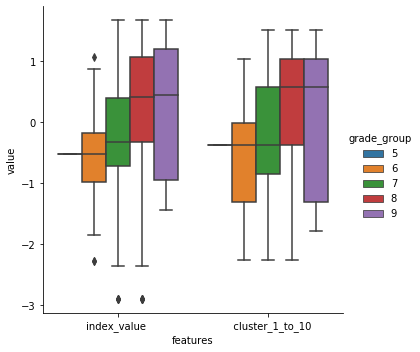

In [33]:
data = pd.concat([df['grade_group'], features.iloc[:,18:20]], axis=1)
data = pd.melt(data, id_vars="grade_group",
                     var_name="features",
                     value_name='value')
sb.catplot(x="features", y="value", hue="grade_group", data=data, kind="box")

הצגת הנתונים במפת חום: ניתן לראות במפה קשר גבוה בין 2 מדדי המצב הסוציואקונומי ולכן בהמשך נשקול לצרפם.

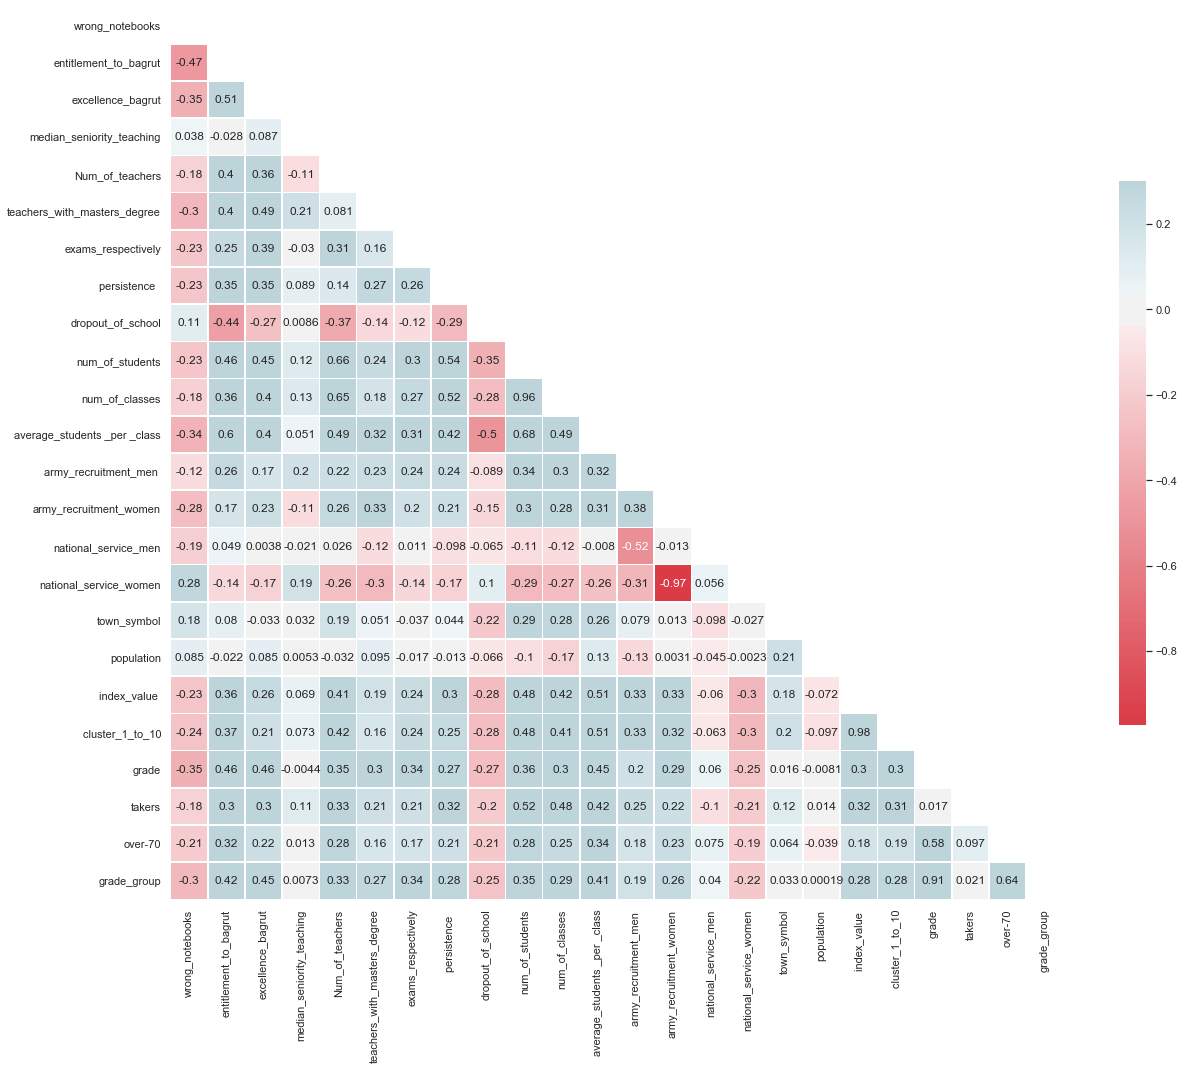

In [34]:
sb.set(style="white")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20,20))
cmap = sb.diverging_palette(10, 220, as_cmap=True)
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink": .5},annot=True)

עד כה לא הצחנו למצוא גורמים בעל קשר מובהק לציון, היו מספר גורמים שנראים בעלי השפעה קלה כמו מספר התלמידים בכיתה, מספר המורים בבית הספר והמדד הסוציואקונומי. 
ננסה לבדוק שילובי נתונים שונים ולראות את ההשפעה שלהם אחד על השני או על הציון הסופי. 
אנו מאמינים כי לא נמצא משהו מובהק יותר ונאלץ לחפש מידע נוסף לגבי הבגרויות עצמן, לגבי בתי הספר או נתונים לגבי הישובים.
בהמשך ננסה לאמן מודלים שונים על בסיס הנתונים שלנו ונבחן את התוצאות שיתקבלו על נתונים של שנה אחרת.